<a href="https://colab.research.google.com/github/nkr9/Deep-learning-experiment/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experiment 8: Sentiment Analysis on Text Data using Recurrent Neural Networks (RNN)

### Objective:
To build and train an RNN model for classifying the sentiment (positive or
negativ.s.

## Dataset:
  It is a collection of tweets, which divided into classes like hate speech, offensive and normal tweets.

### 1. Importing Libraries

In [ ]:
import numpy as np
import pandas as pd

### 2. Dataset Loading

In [ ]:
df = pd.read_csv("train.csv")

In [ ]:
df.head()

,count,hate_speech_count,offensive_language_count,neither_count,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


### 3. Inspecting Dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   count                     24783 non-null  int64 
 1   hate_speech_count         24783 non-null  int64 
 2   offensive_language_count  24783 non-null  int64 
 3   neither_count             24783 non-null  int64 
 4   class                     24783 non-null  int64 
 5   tweet                     24783 non-null  object
dtypes: int64(5), object(1)
memory usage: 1.1+ MB


In [ ]:
df.isnull().sum()

count                       0
hate_speech_count           0
offensive_language_count    0
neither_count               0
class                       0
tweet                       0
dtype: int64

In [ ]:
df.describe()

,count,hate_speech_count,offensive_language_count,neither_count,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,3.243473,0.280515,2.413711,0.549247,1.110277
std,0.883060,0.631851,1.399459,1.113299,0.462089
min,3.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,2.000000,0.000000,1.000000
50%,3.000000,0.000000,3.000000,0.000000,1.000000
75%,3.000000,0.000000,3.000000,0.000000,1.000000
max,9.000000,7.000000,9.000000,9.000000,2.000000


### 4. Creating Labels

In [ ]:
df["labels"] = df['class'].map({0:"Hate Speech", 1:"Offensive Language", 2:"No hate or offensive"})

In [ ]:
df.head()

,count,hate_speech_count,offensive_language_count,neither_count,class,tweet,labels
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,No hate or offensive
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive Language
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive Language
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive Language
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive Language


In [ ]:
data = df[["tweet","labels"]]

In [ ]:
data

,tweet,labels
0,!!! RT @mayasolovely: As a woman you shouldn't...,No hate or offensive
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive Language
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive Language
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive Language
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive Language
...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,Offensive Language
24779,"you've gone and broke the wrong heart baby, an...",No hate or offensive
24780,young buck wanna eat!!.. dat nigguh like I ain...,Offensive Language
24781,youu got wild bitches tellin you lies,Offensive Language


### 5. Data Preprocessing and Data Cleaning

In [ ]:
import re
!pip install nltk
import nltk
import string
from tensorflow.keras.preprocessing.text import Tokenizer
token= Tokenizer(oov_token='<nothing>')

In [ ]:
# Importing stop words
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rajse\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Import stemming
stemmer = nltk.SnowballStemmer("english")

In [ ]:
# Data cleaning
def clean_data(text):
    text = str(text).lower()
    text = re.sub(r'https?://\S+|www\.S+','',text)
    text = re.sub(r'\[.*?\]','',text)
    text = re.sub('<.*?>+','',text)
    text = re.sub('[%s]'%re.escape(string.punctuation),'',text)
    text = re.sub('\n','',text)
    #stop words removal
    text = [word for word in text.split(' ') if word not in stopwords]
    text = " ".join(text)
    #stemming the text
    text = [stemmer.stem(word) for word in text.split(' ')]
    text = " ".join(text)
    return text

In [ ]:
data["tweet"] = data["tweet"].apply(clean_data)

C:\Users\rajse\AppData\Local\Temp\ipykernel_17932\1832165696.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["tweet"] = data["tweet"].apply(clean_data)


In [ ]:
data

,tweet,labels
0,rt mayasolov woman shouldnt complain clean ho...,No hate or offensive
1,rt mleew17 boy dat coldtyga dwn bad cuffin da...,Offensive Language
2,rt urkindofbrand dawg rt 80sbaby4lif ever fuc...,Offensive Language
3,rt cganderson vivabas look like tranni,Offensive Language
4,rt shenikarobert shit hear might true might f...,Offensive Language
...,...,...
24778,yous muthafin lie 8220lifeask 20pearl coreyema...,Offensive Language
24779,youv gone broke wrong heart babi drove redneck...,No hate or offensive
24780,young buck wanna eat dat nigguh like aint fuck...,Offensive Language
24781,youu got wild bitch tellin lie,Offensive Language


In [ ]:
data['labels'].value_counts()

labels
Offensive Language      19190
No hate or offensive     4163
Hate Speech              1430
Name: count, dtype: int64

In [ ]:
# Separate each class
class_0 = data[data['labels'] == 'Offensive Language']        # 19,190
class_1 = data[data['labels'] == 'No hate or offensive']      # 4,163
class_2 = data[data['labels'] == 'Hate Speech']               # 1,430

# Target size
target_size = len(class_1)  # 4,163

# Downsample Offensive Language
class_0_balanced = class_0.sample(n=target_size, random_state=42)

# Upsample Hate Speech
class_2_balanced = class_2.sample(n=target_size, replace=True, random_state=42)

# Combine and shuffle
balanced_data = pd.concat([class_0_balanced, class_1, class_2_balanced])
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Check new class distribution
print(balanced_data['labels'].value_counts())

labels
Hate Speech             4163
No hate or offensive    4163
Offensive Language      4163
Name: count, dtype: int64


### 6. Use of Tokenizer

In [ ]:
token.fit_on_texts(balanced_data['tweet'])

In [ ]:
list(token.word_index.items())[0:20]  #index of each word(fomaton of vocab)

[('<nothing>', 1),
 ('rt', 2),
 ('bitch', 3),
 ('like', 4),
 ('hoe', 5),
 ('trash', 6),
 ('fuck', 7),
 ('nigga', 8),
 ('im', 9),
 ('get', 10),
 ('dont', 11),
 ('faggot', 12),
 ('ass', 13),
 ('pussi', 14),
 ('u', 15),
 ('got', 16),
 ('nigger', 17),
 ('bird', 18),
 ('white', 19),
 ('lol', 20)]

In [ ]:
list(token.word_counts.items())[0:20]  #frequency of word counts

[('your', 353),
 ('faggot', 743),
 ('fuckhead', 7),
 ('entmagazin', 1),
 ('magisto', 1),
 ('digitalskept', 1),
 ('project', 10),
 ('could', 86),
 ('lead', 16),
 ('militari', 7),
 ('program', 3),
 ('requir', 3),
 ('full', 92),
 ('op', 6),
 ('mock', 96),
 ('test', 15),
 ('video', 66),
 ('charli', 258),
 ('baker', 23),
 ('campaign', 6)]

In [ ]:
token.document_count     # count of no. of sentences in document

12489

In [ ]:
sequence= token.texts_to_sequences(balanced_data['tweet'])    # generation of sequence for every sentence
sequence[0:20]

[[29, 12, 1971],
 [7454, 7455, 7456, 1426, 181, 956, 1972, 4051, 4052, 165, 2267, 159, 1018],
 [227, 46, 677, 2268, 221, 2269, 1083, 1427, 1150, 734],
 [49, 41, 1428, 1084, 12, 213, 2270],
 [3249, 1567, 1973],
 [7, 2668, 3],
 [32, 131, 105, 7457, 94, 28, 132, 178, 766, 703],
 [4053, 33, 3250, 121, 354, 3250, 121, 44, 121, 704, 3251, 7458],
 [902, 9, 301, 11, 122, 82, 23, 289, 2669, 289, 55],
 [2,
  7459,
  5226,
  2670,
  1568,
  597,
  23,
  7460,
  166,
  185,
  25,
  164,
  108,
  5,
  302,
  2670],
 [2, 3252, 3, 2271, 1974, 4, 5227],
 [35, 3, 534, 462, 96, 141, 96, 2272, 649, 50, 618, 345],
 [50, 847, 105, 84, 83, 903, 1569, 40, 1233, 1019, 135, 3253, 1429],
 [1430, 73, 678, 355, 7461, 26, 1020, 3, 11, 30],
 [4054, 3, 8, 2671, 132, 55, 15, 705, 14, 7462, 15, 705, 14],
 [5228, 29, 85, 3],
 [44, 30, 356, 10, 7463, 848, 4, 557, 2672, 7464],
 [25, 37, 6, 143, 37, 1730],
 [619, 1328, 767, 1975, 768, 1329, 371],
 [2, 7465, 7466, 1731, 5229, 769, 94, 450, 463, 1976, 240, 7467, 515]]

In [ ]:
from keras.utils import pad_sequences

In [ ]:
sequence= pad_sequences(sequence,padding='post')

In [ ]:
sequence

array([[   29,    12,  1971, ...,     0,     0,     0],
       [ 7454,  7455,  7456, ...,     0,     0,     0],
       [  227,    46,   677, ...,     0,     0,     0],
       ...,
       [ 5756,   507,   273, ...,     0,     0,     0],
       [  550,    41,    29, ...,     0,     0,     0],
       [    2, 19131,   180, ...,     0,     0,     0]])

## Sentiment Analysis of Tweets

In [ ]:
from keras import Sequential
from keras.layers import Dense,SimpleRNN,Embedding,Flatten,Dropout
from sklearn.model_selection import train_test_split

In [ ]:
X = sequence
Y = np.array(balanced_data["labels"])

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [ ]:
X_train

array([[   2, 9697, 1462, ...,    0,    0,    0],
       [1106, 1173, 2022, ...,    0,    0,    0],
       [8639,   17,    0, ...,    0,    0,    0],
       ...,
       [6683, 1130, 6684, ...,    0,    0,    0],
       [5524, 3434, 4246, ...,    0,    0,    0],
       [3460,   81,   31, ...,    0,    0,    0]])

In [ ]:
X_train.shape

(8367, 26)

In [ ]:
# Creating Early stopping
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
# create sequential layer
from keras import Input
from keras.regularizers import l2

vocab_size = len(token.word_index) + 1
model = Sequential()
model.add(Input(shape=(X.shape[1],)))  # Explicit input shape
model.add(Embedding(input_dim=vocab_size, output_dim=100))
model.add(SimpleRNN(64,input_shape=(X.shape[1],1),return_sequences=False, kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))
model.summary()


C:\Users\rajse\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 26, 100)             │       1,913,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ (None, 64)                  │          10,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,924,055 (7.34 MB)

 Trainable params: 1,924,055 (7.34 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# one-hot encode the target variables
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Step 1: Encode string labels to integers
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)  # Y should be the original label column (1D)

# Step 2: Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_encoded, test_size=0.33, random_state=42)

# Step 3: Convert to one-hot encoding for model input
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [ ]:
from tensorflow import keras
# Compile the model
model.compile(loss=keras.losses.CategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])
# Fit the model
history = model.fit(X_train,Y_train,epochs=10,validation_data=(X_test,Y_test),callbacks=[early_stop])

Epoch 1/10
262/262 ━━━━━━━━━━━━━━━━━━━━ 18s 47ms/step - accuracy: 0.5491 - loss: 0.9748 - val_accuracy: 0.8515 - val_loss: 0.4867
Epoch 2/10
262/262 ━━━━━━━━━━━━━━━━━━━━ 23s 55ms/step - accuracy: 0.9293 - loss: 0.2975 - val_accuracy: 0.8540 - val_loss: 0.4787
Epoch 3/10
262/262 ━━━━━━━━━━━━━━━━━━━━ 21s 56ms/step - accuracy: 0.9747 - loss: 0.1501 - val_accuracy: 0.8552 - val_loss: 0.6361
Epoch 4/10
262/262 ━━━━━━━━━━━━━━━━━━━━ 15s 58ms/step - accuracy: 0.9844 - loss: 0.1090 - val_accuracy: 0.8450 - val_loss: 0.6192
Epoch 5/10
262/262 ━━━━━━━━━━━━━━━━━━━━ 21s 59ms/step - accuracy: 0.9855 - loss: 0.0875 - val_accuracy: 0.8588 - val_loss: 0.5907


### Visualization of Accuracy

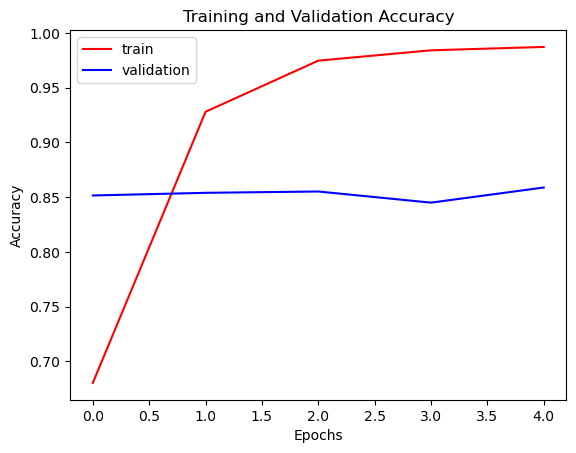

In [ ]:
import matplotlib.pyplot as plt

# Access the accuracy history
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Visualization of Loss

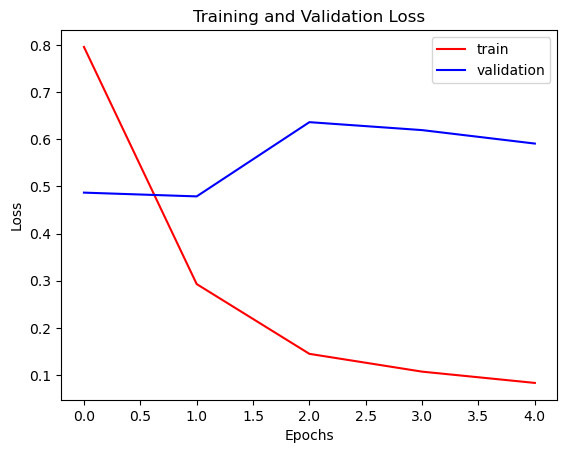

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Sample Testing

In [ ]:
sample = "I'll kill you"
sample = clean_data(sample)

In [ ]:
# Tokenize and pad the sample
sample_sequence = token.texts_to_sequences([sample])
sample_padded = pad_sequences(sample_sequence, padding='post', maxlen=X_train.shape[1])

# Make the prediction
prediction = model.predict(sample_padded)

# Get the predicted class
predicted_class_index = np.argmax(prediction)
predicted_class = label_encoder.inverse_transform([predicted_class_index])[0]


print(f"The predicted class for the sample is: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step
The predicted class for the sample is: Hate Speech
